In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
athlete = pd.read_csv('athlete_events.csv')

In [217]:
summer=athlete[athlete['Season'] == 'Summer']

In [218]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [6]:
hosts=(
    summer
    .groupby('Year')['City']
    .unique()
)
hosts=list(hosts)
cities_hosting = []
for host in hosts:
    cities_hosting.append(host[0])
    
# cities_hosting

In [47]:
summer_gold_winners=summer[summer['Medal']=='Gold']
summer_silver_winners=summer[summer['Medal']=='Silver']
summer_bronze_winners=summer[summer['Medal']=='Bronze']

In [62]:
bronze = (
    summer_bronze_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)

)

bronze=bronze.rename(columns = {'Event':'Bronze'})

medals_guia = bronze.drop('Bronze',axis=1)

# medals_bronze=medals_bronze.rename(columns = {'Event':'Bronze'})

# keys = list(medals_guia.columns.values)
# i1 = medals_bronze.set_index(keys).index
# i2 = medals_guia.set_index(keys).index
# medals_bronze_guia=medals_bronze[i1.isin(i2)]

# medals_bronze_guia=medals_bronze_guia.reset_index(drop=True)

In [63]:
silver=(
    summer_silver_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)

    # .groupby('Year')
    # .plot.bar(x='Year',figsize=(20,10))
)

silver=silver.rename(columns = {'Event':'Silver'})

keys = list(medals_guia.columns.values)
i1 = silver.set_index(keys).index
i2 = medals_guia.set_index(keys).index
silver_guia=silver[i1.isin(i2)]
silver_guia=silver_guia.reset_index(drop=True)
# medals_silver_guia

In [64]:
gold = (
    summer_gold_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)
    # .sort_values(by='Gold')
    # .head(200)
    # .reset_index(drop=True)
    # .groupby('Year')
)

gold=gold.rename(columns = {'Event':'Gold'})

keys = list(medals_guia.columns.values)
i1 = gold.set_index(keys).index
i2 = medals_guia.set_index(keys).index
gold_guia=gold[i1.isin(i2)]
gold_guia=gold_guia.reset_index(drop=True)

In [68]:
medallero=(
    bronze
    .merge(silver_guia,on=['Year','NOC'],how='outer')
    .fillna(0)
    .merge(gold_guia,on=['Year','NOC'],how='outer')
    .fillna(0)
    .sort_values(by=['Year','Gold','Silver','Bronze'],ascending=False)
)

In [208]:
cols = ['Year','NOC','Gold','Silver','Bronze']
medallero=medallero[cols]
medallero=medallero.reset_index(drop=True)


In [209]:
medallero['Silver']=medallero['Silver'].astype(int)
medallero['Gold']=medallero['Gold'].astype(int)

In [210]:
years=(
    medallero['Year']
    .unique()
)

In [211]:
years

array([2016, 2012, 2008, 2004, 2000, 1996, 1992, 1988, 1984, 1980, 1976,
       1972, 1968, 1964, 1960, 1956, 1952, 1948, 1936, 1932, 1928, 1924,
       1920, 1912, 1908, 1906, 1904, 1900, 1896])

In [342]:
medallero['Ranking']=np.zeros(len(medallero))

In [343]:
medallero

,Year,NOC,Gold,Silver,Bronze,Ranking
0,2016,USA,46,37,38,0.0
1,2016,GBR,27,23,17,0.0
2,2016,CHN,26,18,26,0.0
3,2016,RUS,19,17,20,0.0
4,2016,GER,17,10,15,0.0
5,2016,JPN,12,8,21,0.0
6,2016,FRA,10,18,14,0.0
7,2016,KOR,9,3,9,0.0
8,2016,ITA,8,12,8,0.0
9,2016,AUS,8,11,10,0.0


In [213]:
olimpiadas_2016=medallero[medallero['Year']==2016]
olimpiadas_2016.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==2016]))

olimpiadas_2012=medallero[medallero['Year']==2012]
olimpiadas_2012.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==2012]))

olimpiadas_2008=medallero[medallero['Year']==2008]
olimpiadas_2008.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==2008]))

olimpiadas_2004=medallero[medallero['Year']==2004]
olimpiadas_2004.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==2004]))

olimpiadas_2000=medallero[medallero['Year']==2000]
olimpiadas_2000.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==2000]))

olimpiadas_1996=medallero[medallero['Year']==1996]
olimpiadas_1996.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1996]))

olimpiadas_1992=medallero[medallero['Year']==1992]
olimpiadas_1992.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1992]))

olimpiadas_1988=medallero[medallero['Year']==1988]
olimpiadas_1988.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1988]))

olimpiadas_1984=medallero[medallero['Year']==1984]
olimpiadas_1984.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1984]))

olimpiadas_1980=medallero[medallero['Year']==1980]
olimpiadas_1980.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1980]))

olimpiadas_1976=medallero[medallero['Year']==1976]
olimpiadas_1976.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1976]))

olimpiadas_1972=medallero[medallero['Year']==1972]
olimpiadas_1972.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1972]))

olimpiadas_1968=medallero[medallero['Year']==1968]
olimpiadas_1968.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1968]))

olimpiadas_1964=medallero[medallero['Year']==1964]
olimpiadas_1964.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1964]))

olimpiadas_1960=medallero[medallero['Year']==1960]
olimpiadas_1960.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1960]))

olimpiadas_1956=medallero[medallero['Year']==1956]
olimpiadas_1956.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1956]))

olimpiadas_1952=medallero[medallero['Year']==1952]
olimpiadas_1952.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1952]))

olimpiadas_1948=medallero[medallero['Year']==1948]
olimpiadas_1948.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1948]))

olimpiadas_1936=medallero[medallero['Year']==1936]
olimpiadas_1936.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1936]))

olimpiadas_1932=medallero[medallero['Year']==1932]
olimpiadas_1932.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1932]))

olimpiadas_1928=medallero[medallero['Year']==1928]
olimpiadas_1928.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1928]))

olimpiadas_1924=medallero[medallero['Year']==1924]
olimpiadas_1924.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1924]))

olimpiadas_1920=medallero[medallero['Year']==1920]
olimpiadas_1920.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1920]))

olimpiadas_1912=medallero[medallero['Year']==1912]
olimpiadas_1912.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1912]))

olimpiadas_1908=medallero[medallero['Year']==1908]
olimpiadas_1908.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1908]))

olimpiadas_1906=medallero[medallero['Year']==1906]
olimpiadas_1906.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1906]))

olimpiadas_1904=medallero[medallero['Year']==1904]
olimpiadas_1904.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1904]))

olimpiadas_1900=medallero[medallero['Year']==1900]
olimpiadas_1900.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1900]))

olimpiadas_1896=medallero[medallero['Year']==1896]
olimpiadas_1896.loc[:,'Ranking']=np.arange(1,1+len(medallero[medallero['Year']==1896]))


/Users/gabrielreynoso/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [216]:
medallero_verano_ranking=pd.concat([olimpiadas_2016,olimpiadas_2012,olimpiadas_2008,olimpiadas_2004,olimpiadas_2000,
           olimpiadas_1996,olimpiadas_1992,olimpiadas_1988,olimpiadas_1984,olimpiadas_1980,
           olimpiadas_1976,olimpiadas_1972,olimpiadas_1968,olimpiadas_1964,olimpiadas_1960,
           olimpiadas_1956,olimpiadas_1952,olimpiadas_1948,olimpiadas_1936,olimpiadas_1932,
           olimpiadas_1928,olimpiadas_1924,olimpiadas_1920,olimpiadas_1912,olimpiadas_1908,
           olimpiadas_1906,olimpiadas_1904,olimpiadas_1900,olimpiadas_1896])

In [271]:
Paises_organizadores = ['Greece','France','United States','Great Britain','Sweden','Belgium','Netherlands','Germany',
                       'West Germany', 'East Germany','Finland','Australia','Italy','Japan','Mexico','Canada',
                       'USSR','Russia','South Korea','Spain','China','Brazil']

In [310]:
pais_org_NOC = ['GRE','FRA','USA','GBR','SWE','BEL','NED','GER',
                'FRG','GDR','FIN','AUS','ITA','JPN','MEX','CAN',
                'USR','RUS','KOR','ESP','CHN','BRA']

In [ ]:
Hist_Mex=(
    medallero_verano_ranking[medallero_verano_ranking['NOC']=='MEX']
    .set_index('Year')
    .Ranking
)

plt.plot(Hist_Mex.index,Hist_Mex.values)
plt.gca().invert_yaxis()

plt.show()

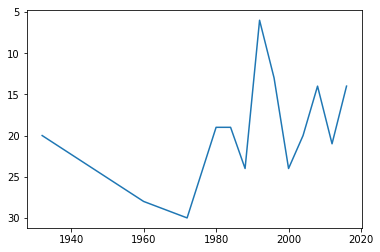

In [340]:
Hist_Spain=(
    medallero_verano_ranking[medallero_verano_ranking['NOC']=='ESP']
    .set_index('Year')
    .Ranking
)

plt.plot(Hist_Spain.index,Hist_Spain.values)
plt.gca().invert_yaxis()

plt.show()

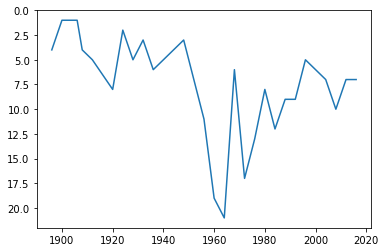

In [341]:
Hist_France=(
    medallero_verano_ranking[medallero_verano_ranking['NOC']=='FRA']
    .set_index('Year')
    .Ranking
)

plt.plot(Hist_France.index,Hist_France.values)
plt.gca().invert_yaxis()

plt.show()